The notebook analyzes the kaggle dataset 'Country, Regional and World GDP (Gross Domestic Product)'. It shows the development of Germany's GDP compared to USA and China. 

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv("..\\data\\gdp.csv")

In [21]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [22]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [24]:
df.isnull().values.any()

False

In [25]:
list(df['Country Name'].unique())

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle inc

In [26]:
mean_gdp = df['Value'].mean()
median_gdp = df['Value'].median()
mean_gdp, median_gdp

(1005972329901.0626, 14368795335.6958)

In [27]:
mean_gdp_row = df.loc[df['Value'] == mean_gdp]
median_gdp_row = df.loc[df['Value'] == median_gdp]
median_gdp_row

,Country Name,Country Code,Year,Value
1808,Pre-demographic dividend,PRE,1965,1.436880e+10


In [28]:
min_gdp = df['Value'].min()
max_gdp = df['Value'].max()
min_gdp, max_gdp

(8824447.74022325, 79049230590610.9)

In [29]:
min_gdp_row = df.loc[df['Value'] == min_gdp]
max_gdp_row = df.loc[df['Value'] == max_gdp]
[min_gdp_row, max_gdp_row]

[      Country Name Country Code  Year         Value
 10816       Tuvalu          TUV  1990  8.824448e+06,
      Country Name Country Code  Year         Value
 2303        World          WLD  2014  7.904923e+13]

In [30]:
germany = df[df['Country Name'] == "Germany"]
usa = df[df['Country Name'] == "United States"]
china = df[df['Country Name'] == "China"]
tuvalu = df[df['Country Name'] == "Tuvalu"]

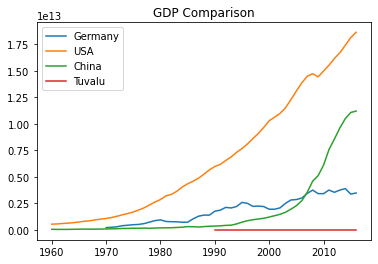

In [31]:
plt.plot(germany['Year'], germany['Value'], label = "Germany")
plt.plot(usa['Year'], usa['Value'], label="USA")
plt.plot(china['Year'], china['Value'], label="China")
plt.plot(tuvalu['Year'], tuvalu['Value'], label="Tuvalu")
plt.title("GDP Comparison")
plt.legend()
plt.show()

In [32]:
merged_china_germany = pd.merge(germany, china, on=['Year'])
merged_china_germany.head()

,Country Name_x,Country Code_x,Year,Value_x,Country Name_y,Country Code_y,Value_y
0,Germany,DEU,1970,2.150218e+11,China,CHN,9.260297e+10
1,Germany,DEU,1971,2.490392e+11,China,CHN,9.980096e+10
2,Germany,DEU,1972,2.986672e+11,China,CHN,1.136876e+11
3,Germany,DEU,1973,3.968667e+11,China,CHN,1.385443e+11
4,Germany,DEU,1974,4.436186e+11,China,CHN,1.441821e+11


In [33]:
merged_china_germany['diff_value'] = merged_china_germany['Value_y'] - merged_china_germany['Value_x']
merged_china_germany.sort_values('diff_value', ascending=False).head()

,Country Name_x,Country Code_x,Year,Value_x,Country Name_y,Country Code_y,Value_y,diff_value
46,Germany,DEU,2016,3.477796e+12,China,CHN,1.119915e+13,7.721349e+12
45,Germany,DEU,2015,3.375611e+12,China,CHN,1.106467e+13,7.689055e+12
44,Germany,DEU,2014,3.890607e+12,China,CHN,1.048237e+13,6.591765e+12
43,Germany,DEU,2013,3.752514e+12,China,CHN,9.607224e+12,5.854711e+12
42,Germany,DEU,2012,3.543984e+12,China,CHN,8.560547e+12,5.016563e+12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


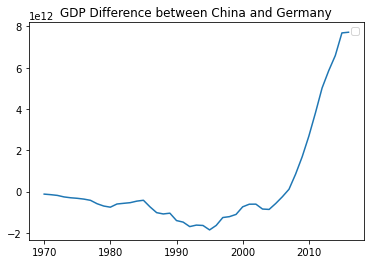

In [34]:
plt.plot(merged_china_germany['Year'], merged_china_germany['diff_value'])
plt.title("GDP Difference between China and Germany")
plt.legend()
plt.show()